# Intro to Cartopy
by Daniel Wefer

# **Imports**

The common imports you want for cartopy are as follows


In [2]:
import matplotlib.pyplot as plt       #basic plotting library

import numpy as np                    #importing numpy for math functionality

from cartopy import crs as ccrs       #Coordinate Reference System

from cartopy import feature as cfeature #cartopy's library of cartographic features

## **Building a Map**

First and foremost, you must make a figure using matplotlib. 

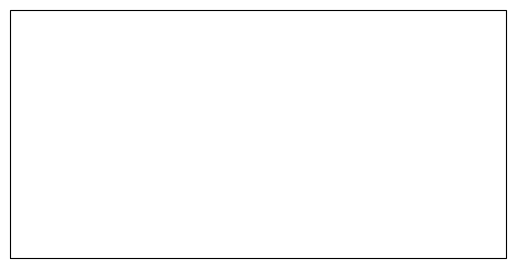

In [3]:
figure = plt.figure()
ax = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree(central_longitude=-89))

### What's up with "Projection =" ?

using Cartopy's "crs" (Coordinate Reference System) class, we have changed a simple matplotlib plot into an object with a chosen geographic projection

## But Where is everything?

Using Cartopy's library of cartographic features, we can now plot shapefiles to our subplot. 
For this example, we'll call the coastlines and the stock_img member functions to add their respective features

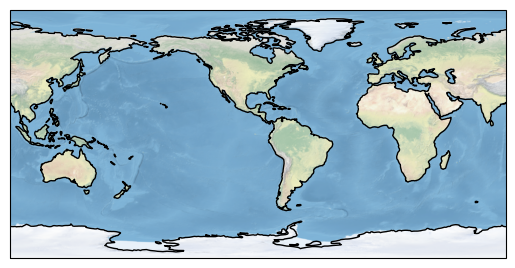

In [4]:
ax.coastlines()
ax.stock_img()
figure

## But what if I want a regional map?

Cartopy's set_extent method restricts the map's size, below I will set up a regional map surrounding Illinois. I'll also use the "add_feature" method to add some neat features!

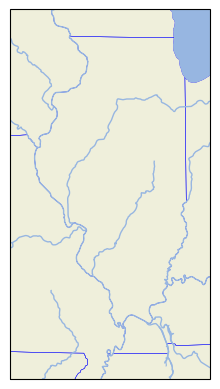

In [6]:
west_extent = -92
east_extent = -87
south_extent = 36
north_extent = 43

fig = plt.figure()
ax = plt.subplot(1, 1, 1, projection = ccrs.AlbersEqualArea(central_longitude=-89))
ax.set_extent([west_extent, east_extent, south_extent, north_extent], crs = ccrs.PlateCarree())    #use PlateCarree as the default lat/lon coordinate reference system
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='blue')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)

## But what if I want to add data?

##### It's as simple as calling .plot() with your given data, and transforming it with a matching coordinate reference system using the keyword "transform"!

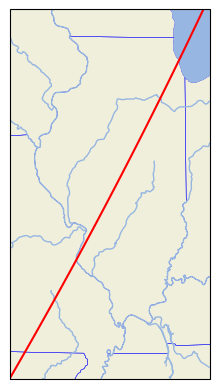

In [8]:
x_values = np.linspace(west_extent, east_extent, 100)
y_values = np.linspace(south_extent, north_extent, 100)

ax.plot(x_values, y_values, transform = ccrs.PlateCarree(), color='red', linewidth=1.5, linestyle= '-')

fig

## But what if I want more than one plot?

##### This is relatively simple through matplotlib!

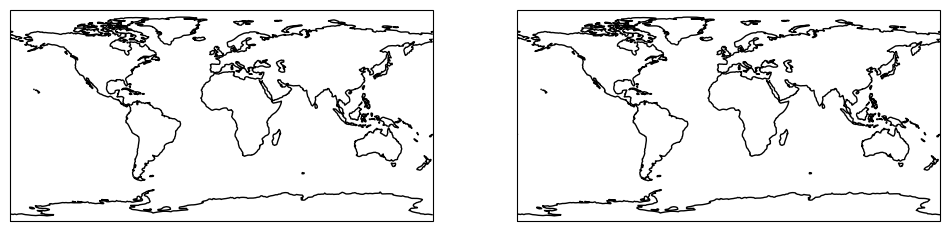

In [21]:

# set fig and axes equal to a subplot you define, the first argument is columns and the second is rows
fig, axs = plt.subplots(1, 2, subplot_kw = {'projection': ccrs.PlateCarree()}, figsize=(12,8))

# Now we can access our subplots and add features easily!

axs[0].coastlines()
axs[1].coastlines()